<a href="https://colab.research.google.com/github/MaxCojocari/covid-19_forecaster/blob/main/forecasting_choice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For further details and explanations you can visit the sources below:

* https://towardsdatascience.com/a-lightgbm-autoregressor-using-sktime-6402726e0e7b

* https://github.com/alan-turing-institute/sktime/blob/main/examples/01_forecasting.ipynb

* https://www.sktime.org/en/stable/

* https://towardsdatascience.com/why-start-using-sktime-for-forecasting-8d6881c0a518


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install sktime[all_extras]==0.10.1

  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
pip install matplotlib==3.1.1

  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
import numpy as np
import pandas as pd
from sktime.utils.plotting import plot_series

In [5]:
y = pd.read_csv('/content/drive/MyDrive/PBL_sem2/cases_covid_de.csv',
                index_col=0, squeeze=True, dtype={1: float})

# we make sure that time index is properly formatted
y.index = pd.PeriodIndex(y.index, freq='D')
y.name = "Number of cases"


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e663fbf90>)

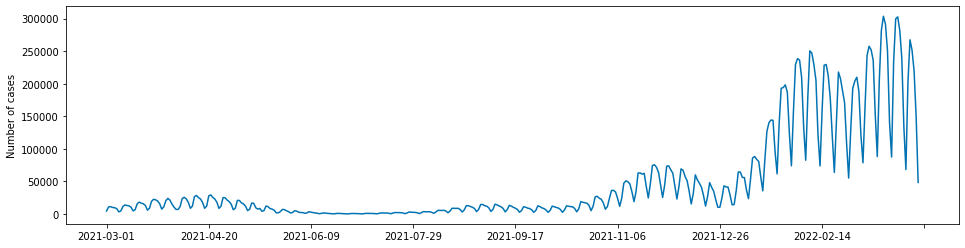

In [6]:
plot_series(y, markers=[''])

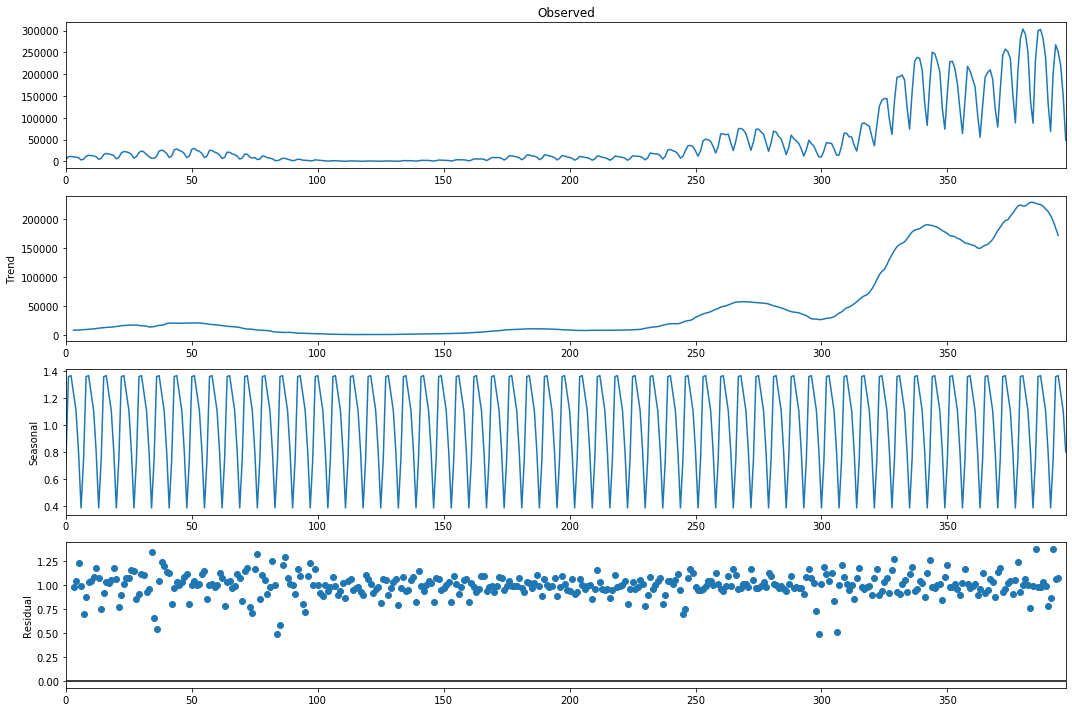

In [7]:
# Time series decomposition

# import necessary Python packages
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

decomposition = sm.tsa.seasonal_decompose(y.values, model = 'multiplicable', period=7)
matplotlib.rcParams['figure.figsize'] = [15.0, 10.0]
fig = decomposition.plot()

In [8]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2021-01", periods=14, freq="D")), is_relative=False
)
fh

ForecastingHorizon(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
             '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
             '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
             '2021-01-13', '2021-01-14'],
            dtype='period[D]', is_relative=False)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e52d5ff10>)

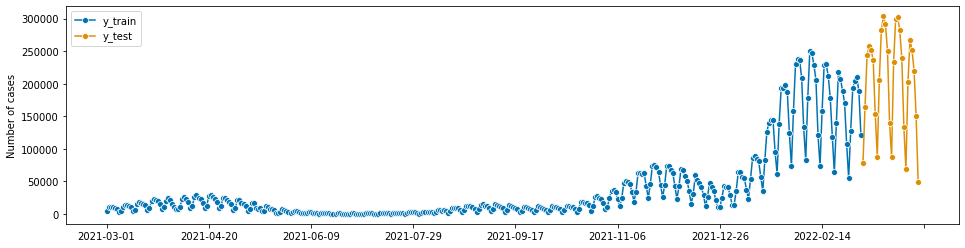

In [9]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=28)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [10]:
print(y_train.shape[0], y_test.shape[0])

370 28


In [11]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [12]:
#NaiveForecaster
from sktime.forecasting.naive import NaiveForecaster

# we can simply take the indices from `y_test` where they already are stored
fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="last", sp=7)

forecaster.fit(y_train)

# y_pred will contain the predictions
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e52c7bdd0>)

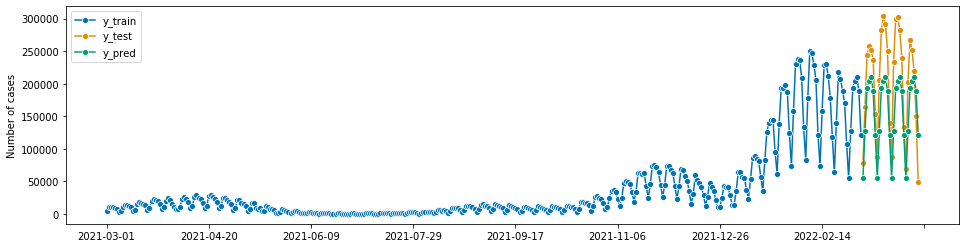

In [13]:
# plotting for illustration
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [14]:
mean_absolute_percentage_error(y_test, y_pred)

0.3207432717934101

In [15]:
#Setting the data for test and train
y_train, y_test = temporal_train_test_split(y, test_size=14)

#Setting the forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

**Testing each forecasting model on covid cases dataset.**

Forecasters to be tested:

* ```ExponentialSmoothing```, ```ThetaForecaster```, and ```autoETS``` from ```statsmodels```
* ```ARIMA``` and ```autoARIMA``` from ```pmdarima```
* ```BATS``` and ```TBATS``` from ```tbats```
* ```Prophet``` which interfaces Facebook ```prophet```

0.21618841283449713

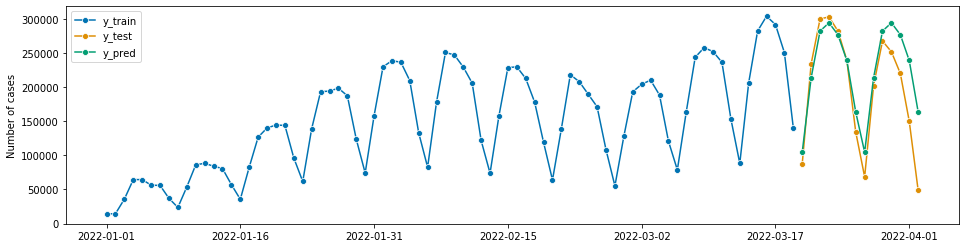

In [16]:
#exponential smoothing algorithm
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend=None, seasonal="Additive", sp=7)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred)

0.23721480607278173

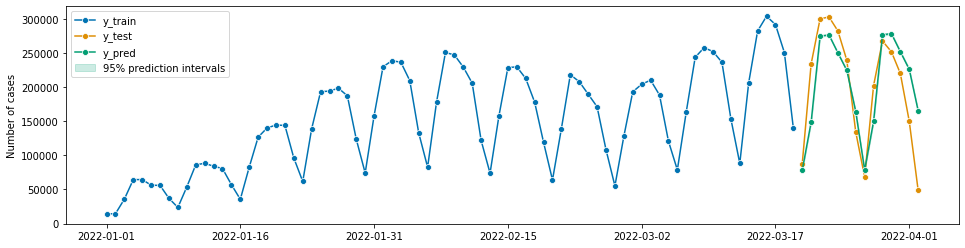

In [17]:
#ThetaForecaster
from sktime.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=7)

forecaster.fit(y_train)

# setting return_pred_int argument to True; alpha determines percentiles
# intervals are lower = alpha/2-percentile, upper = (1-alpha/2)-percentile
alpha = 0.05  # 2.5%/97.5% prediction intervals
y_pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)[1]
y_pred = (y_pred_ints['upper'] + y_pred_ints['lower'])/2

fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

mean_absolute_percentage_error(y_test, y_pred)

In [18]:
#lower and upper bounds for ThetaForecaster
y_pred_ints

,lower,upper
2022-03-20,77133.942317,78638.022507
2022-03-21,147970.776206,149618.413502
2022-03-22,273708.685446,275488.337126
2022-03-23,275396.261905,277298.789578
2022-03-24,249032.329539,251050.264868
2022-03-25,223342.378015,225469.468618
2022-03-26,162867.568854,165098.480299
2022-03-27,77268.550802,79598.661812
2022-03-28,148627.106081,151052.362513
2022-03-29,275266.965440,277783.772983


0.17351505257870636

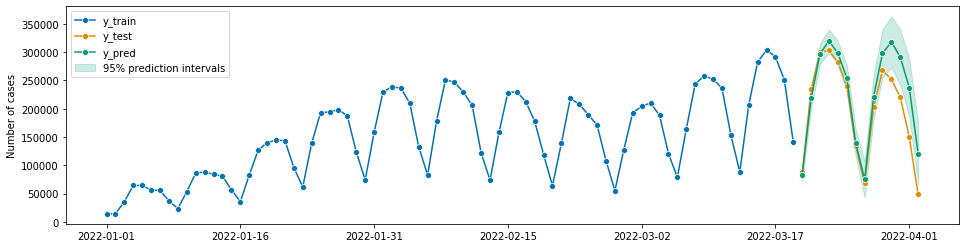

In [19]:
#AutoARIMA
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=7, suppress_warnings=True)

forecaster.fit(y_train)

alpha = 0.05 
y_pred, y_pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)

fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

mean_absolute_percentage_error(y_test, y_pred)

In [20]:
y_pred_ints #for AutoARIMA

,lower,upper
2022-03-20,71494.980458,94801.390361
2022-03-21,201830.234695,235229.152672
2022-03-22,278686.170328,315590.840459
2022-03-23,299608.558419,339713.690723
2022-03-24,276304.661020,319373.078631
2022-03-25,230926.499025,276767.043893
2022-03-26,114828.499050,163282.834130
2022-03-27,42976.706943,107256.509856
2022-03-28,182238.253484,259541.197517
2022-03-29,255658.475515,339938.325027


In [21]:
# obtain the fitted parameters
forecaster.get_fitted_params()

{'aic': 7561.384992034753,
 'aicc': 7561.68933986084,
 'ar.S.L14': -0.49927448813147846,
 'ar.S.L7': 0.22689443958101224,
 'bic': 7588.8921160384825,
 'hqic': 7572.304361001405,
 'ma.L1': 0.026446196351431316,
 'ma.L2': -0.35284310197166824,
 'ma.S.L14': 0.8144513531591159,
 'ma.S.L7': -0.08819556715068404,
 'order': (0, 1, 2),
 'seasonal_order': (2, 1, 2, 7),
 'sigma2': 35350353.19948915}

0.1732865182839551

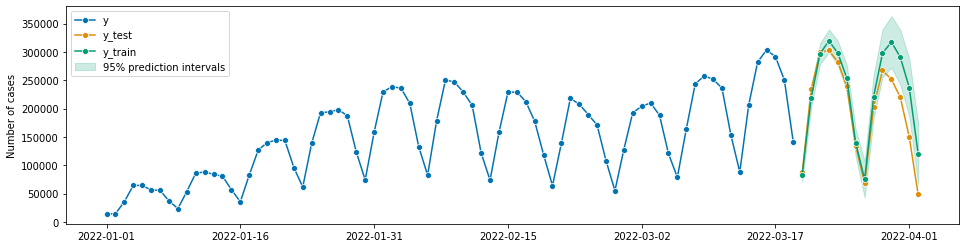

In [56]:
#ARIMA
from sktime.forecasting.arima import ARIMA
forecaster = ARIMA(
    order=(0, 1, 2), seasonal_order=(2, 1, 2, 7), suppress_warnings=True
)

forecaster.fit(y_train)

# setting return_pred_int argument to True; alpha determines percentiles
# intervals are lower = alpha/2-percentile, upper = (1-alpha/2)-percentile
alpha = 0.05  # 2.5%/97.5% prediction intervals
y_pred, y_pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)

fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y", "y_test", "y_train"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

mean_absolute_percentage_error(y_pred, y_test)

In [57]:
y_pred_ints #for ARIMA

,lower,upper
2022-03-20,71488.020054,94794.376201
2022-03-21,201817.308591,235216.087296
2022-03-22,278669.047451,315573.667093
2022-03-23,299587.180126,339692.335494
2022-03-24,276278.012348,319346.516176
2022-03-25,230894.715319,276735.402013
2022-03-26,114791.487631,163246.014431
2022-03-27,42926.761718,107207.314519
2022-03-28,182177.593856,259481.629156
2022-03-29,255588.782534,339870.000297


In [24]:
#BATS and TBATS
from sktime.forecasting.bats import BATS
from sktime.forecasting.tbats import TBATS
forecaster_BATS = BATS(sp=7, use_trend=True, use_box_cox=False)
forecaster_TBATS = TBATS(sp=7, use_trend=True, use_box_cox=False)

forecaster_BATS.fit(y_train, fh=fh)
forecaster_TBATS.fit(y_train, fh=fh)

TBATS(sp=7, use_box_cox=False, use_trend=True)

0.22136739162305535

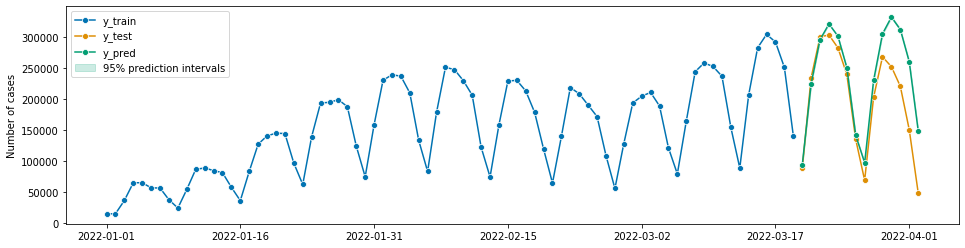

In [25]:
alpha = 0.05 
y_pred, y_pred_ints = forecaster_BATS.predict(fh, return_pred_int=True, alpha=alpha)

fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

mean_absolute_percentage_error(y_pred, y_test)

In [26]:
y_pred_ints #for BATS

,lower,upper
2022-03-20,92512.350585,93279.760776
2022-03-21,223442.374574,224380.192588
2022-03-22,294947.412061,295924.931786
2022-03-23,319916.367202,321019.683852
2022-03-24,300378.338605,301559.817218
2022-03-25,249492.885060,250754.209465
2022-03-26,140163.567133,141575.558848
2022-03-27,95659.936148,97631.110570
2022-03-28,228275.457417,230507.603960
2022-03-29,303412.255963,305776.055186


0.381602843821842

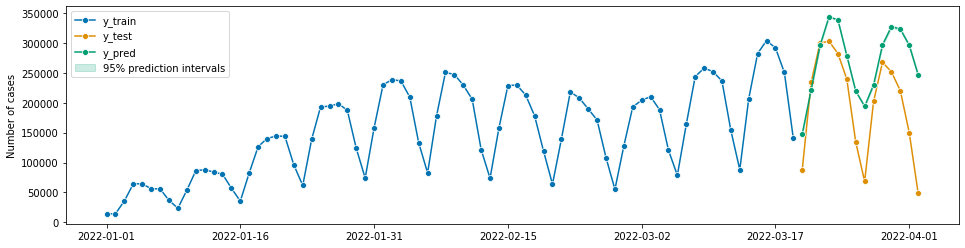

In [27]:
alpha = 0.05 
y_pred, y_pred_ints = forecaster_TBATS.predict(fh, return_pred_int=True, alpha=alpha)

fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

mean_absolute_percentage_error(y_pred, y_test)

In [28]:
y_pred_ints #for TBATS

,lower,upper
2022-03-20,146774.151780,148165.094330
2022-03-21,220609.435993,222499.728272
2022-03-22,294558.352124,296540.968515
2022-03-23,342321.009025,344381.778615
2022-03-24,337326.848713,339393.553263
2022-03-25,277451.412072,279521.071771
2022-03-26,218167.669923,220352.536125
2022-03-27,192684.436184,195159.549874
2022-03-28,228389.259177,231263.463145
2022-03-29,294883.469368,298210.421820


In [29]:
#Facebook Prophet
from sktime.forecasting.fbprophet import Prophet

In [30]:
#The current interface does not support period indices, only pd.DatetimeIndex.
#Consider improving this by contributing the sktime.

#Convert index to pd.DatetimeIndex
z = y.copy()
z = z.to_timestamp(freq="D")
z_train, z_test = temporal_train_test_split(z, test_size=14)

0.25752056602930623

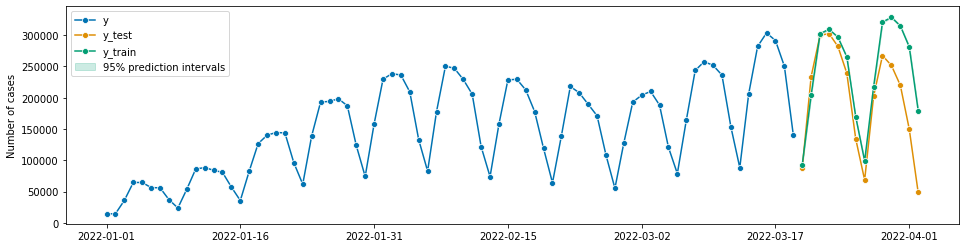

In [31]:
forecaster = Prophet(
    seasonality_mode="multiplicative",
    n_changepoints=int(len(y_train) / 7),
    add_country_holidays={"country_name": "Germany"},
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False
)

forecaster.fit(z_train)

alpha = 0.05  # 2.5%/97.5% prediction intervals
y_pred, y_pred_ints = forecaster.predict(fh.to_relative(cutoff=y_train.index[-1]), return_pred_int=True, alpha=alpha)
y_pred.index = y_test.index


fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y", "y_test", "y_train"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

# #downloading plot
# from google.colab import files
# plt.savefig('Prophet.png')
# files.download('Prophet.png')

mean_absolute_percentage_error(y_pred, y_test)

In [32]:
y_pred_ints #for Prophet

,lower,upper
2022-03-20,91929.740200,94203.708438
2022-03-21,202737.246669,204755.256759
2022-03-22,301725.571319,303424.800814
2022-03-23,308802.078842,310480.029743
2022-03-24,296463.911629,298236.291505
2022-03-25,264114.908708,266054.338135
2022-03-26,167154.950994,168713.733631
2022-03-27,98612.281365,100599.586378
2022-03-28,215929.649982,217750.281235
2022-03-29,319873.974182,321752.435471


0.17927647901206298

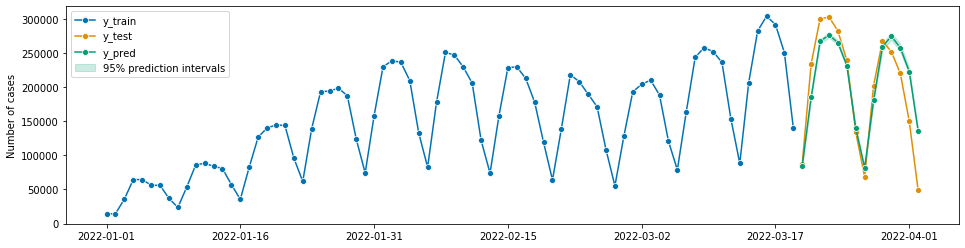

In [33]:
#ETS
from sktime.forecasting.ets import AutoETS
forecaster = AutoETS(auto=True, sp=7, n_jobs=-1)

forecaster.fit(y_train)
alpha = 0.05 
y_pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)[1]

y_pred = (y_pred_ints['upper'] + y_pred_ints['lower'])/2

fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

mean_absolute_percentage_error(y_pred, y_test)

In [34]:
y_pred_ints

,lower,upper
2022-03-20,83921.647486,85315.321096
2022-03-21,183170.317048,187299.015635
2022-03-22,263505.507799,270098.538075
2022-03-23,272221.500711,279952.769492
2022-03-24,261880.722362,268299.532913
2022-03-25,228240.555343,234227.890806
2022-03-26,136669.726614,142865.034174
2022-03-27,80273.261946,83207.899000
2022-03-28,176833.125349,184219.367374
2022-03-29,254258.117386,264412.030896


In [35]:
y_pred

2022-03-20     84618.484291
2022-03-21    185234.666341
2022-03-22    266802.022937
2022-03-23    276087.135101
2022-03-24    265090.127638
2022-03-25    231234.223074
2022-03-26    139767.380394
2022-03-27     81740.580473
2022-03-28    180526.246362
2022-03-29    259335.074141
2022-03-30    274458.539160
2022-03-31    257529.426544
2022-04-01    222761.326463
2022-04-02    135326.710556
Freq: D, dtype: float64

**Advanced evaluation worfklow: rolling re-sampling and aggregate errors, rolling back-testing.**

To evaluate forecasters with respect to their performance in rolling forecasting, the forecaster needs to be tested in a set-up mimicking rolling forecasting, usually on past data, ensuring that the chosen forecaster provides the best accuracy possible.

In [100]:
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter

In [101]:
error_data = []
headers = []

In [102]:
forecaster = ExponentialSmoothing(trend=None, seasonal="Additive", sp=7)
cv = ExpandingWindowSplitter(
    step_length=7, fh=[1, 2, 3, 4, 5, 6, 7], initial_window=int(len(y))-7*12
)

df = evaluate(forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True)
error_data.append(df.iloc[:, 0])
headers.append("ExponentialSmoothing")
df.iloc[:, :5]

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.274793,0.017229,0.005148,314,2022-01-08
1,0.358303,0.015669,0.004760,321,2022-01-15
2,0.282891,0.016615,0.004904,328,2022-01-22
3,0.135025,0.016105,0.004714,335,2022-01-29
4,0.058190,0.017956,0.004555,342,2022-02-05
5,0.093609,0.019340,0.007112,349,2022-02-12
6,0.066485,0.016649,0.005284,356,2022-02-19
7,0.073222,0.016241,0.004705,363,2022-02-26
8,0.197268,0.024749,0.004960,370,2022-03-05
9,0.117893,0.017237,0.004691,377,2022-03-12


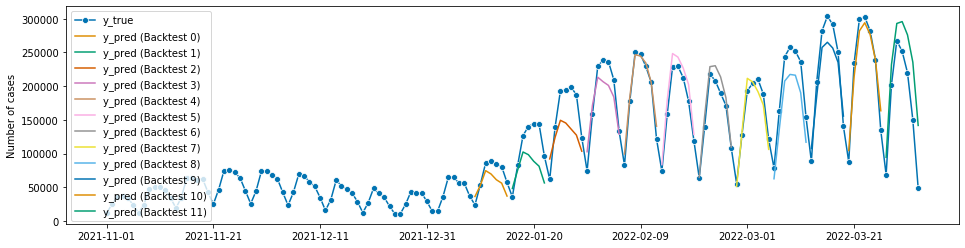

In [103]:
fig, ax = plot_series(
    y['2021-11-01':],
    df["y_pred"].iloc[0],
    df["y_pred"].iloc[1],
    df["y_pred"].iloc[2],
    df["y_pred"].iloc[3],
    df["y_pred"].iloc[4],
    df["y_pred"].iloc[5],
    df["y_pred"].iloc[6],
    df["y_pred"].iloc[7],
    df["y_pred"].iloc[8],
    df["y_pred"].iloc[9],
    df["y_pred"].iloc[10],
    df["y_pred"].iloc[11],
    markers=["o"]+[""]*12,
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(12)],
)
ax.legend();

In [104]:
forecaster = ThetaForecaster(sp=7)
cv = ExpandingWindowSplitter(
    step_length=7, fh=[1, 2, 3, 4, 5, 6, 7], initial_window=int(len(y))-7*12
)

df = evaluate(forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True)
error_data.append(df.iloc[:, 0])
headers.append("ThetaForecaster")
df.iloc[:, :5]

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.386734,0.041959,0.008262,314,2022-01-08
1,0.435357,0.035372,0.007292,321,2022-01-15
2,0.290883,0.033090,0.007686,328,2022-01-22
3,0.172815,0.031258,0.007712,335,2022-01-29
4,0.141913,0.035356,0.008927,342,2022-02-05
5,0.094142,0.038578,0.007305,349,2022-02-12
6,0.073367,0.033180,0.007623,356,2022-02-19
7,0.085728,0.032990,0.007758,363,2022-02-26
8,0.233859,0.033504,0.007404,370,2022-03-05
9,0.155234,0.033336,0.008096,377,2022-03-12


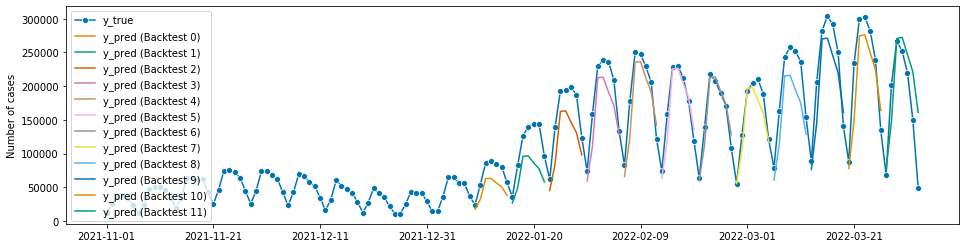

In [105]:
fig, ax = plot_series(
    y['2021-11-01':],
    df["y_pred"].iloc[0],
    df["y_pred"].iloc[1],
    df["y_pred"].iloc[2],
    df["y_pred"].iloc[3],
    df["y_pred"].iloc[4],
    df["y_pred"].iloc[5],
    df["y_pred"].iloc[6],
    df["y_pred"].iloc[7],
    df["y_pred"].iloc[8],
    df["y_pred"].iloc[9],
    df["y_pred"].iloc[10],
    df["y_pred"].iloc[11],
    markers=["o"]+[""]*12,
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(12)],
)
ax.legend();

In [106]:
forecaster = ARIMA(
    order=(0, 1, 2), seasonal_order=(2, 1, 2, 7), suppress_warnings=True
)

cv = ExpandingWindowSplitter(
    step_length=7, fh=[1, 2, 3, 4, 5, 6, 7], initial_window=int(len(y))-7*12
)

df = evaluate(forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True)
error_data.append(df.iloc[:, 0])
headers.append("ARIMA")
df.iloc[:, :5]

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.088818,3.717406,0.012972,314,2022-01-08
1,0.233014,4.138777,0.012033,321,2022-01-15
2,0.077286,1.740532,0.012139,328,2022-01-22
3,0.093587,3.712145,0.012279,335,2022-01-29
4,0.057886,4.081714,0.012109,342,2022-02-05
5,0.070871,2.502533,0.012423,349,2022-02-12
6,0.059234,7.136562,0.013683,356,2022-02-19
7,0.115660,1.452895,0.013146,363,2022-02-26
8,0.141936,2.350989,0.012207,370,2022-03-05
9,0.098510,3.232996,0.011790,377,2022-03-12


In [107]:
error_data

[0     0.274793
 1     0.358303
 2     0.282891
 3     0.135025
 4     0.058190
 5     0.093609
 6     0.066485
 7     0.073222
 8     0.197268
 9     0.117893
 10    0.082293
 11    0.336914
 Name: test_MeanAbsolutePercentageError, dtype: float64, 0     0.386734
 1     0.435357
 2     0.290883
 3     0.172815
 4     0.141913
 5     0.094142
 6     0.073367
 7     0.085728
 8     0.233859
 9     0.155234
 10    0.160496
 11    0.298439
 Name: test_MeanAbsolutePercentageError, dtype: float64, 0     0.088818
 1     0.233014
 2     0.077286
 3     0.093587
 4     0.057886
 5     0.070871
 6     0.059234
 7     0.115660
 8     0.141936
 9     0.098510
 10    0.047079
 11    0.260171
 Name: test_MeanAbsolutePercentageError, dtype: float64]

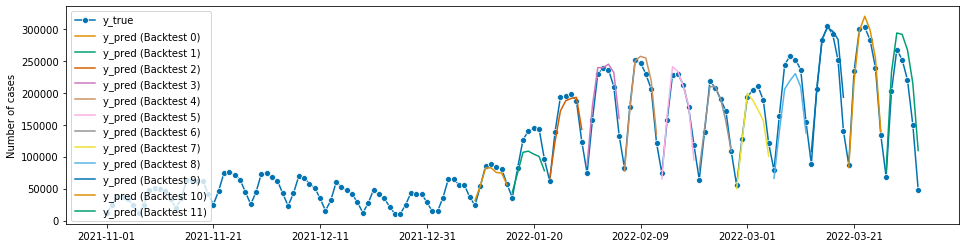

In [108]:
fig, ax = plot_series(
    y['2021-11-01':],
    df["y_pred"].iloc[0],
    df["y_pred"].iloc[1],
    df["y_pred"].iloc[2],
    df["y_pred"].iloc[3],
    df["y_pred"].iloc[4],
    df["y_pred"].iloc[5],
    df["y_pred"].iloc[6],
    df["y_pred"].iloc[7],
    df["y_pred"].iloc[8],
    df["y_pred"].iloc[9],
    df["y_pred"].iloc[10],
    df["y_pred"].iloc[11],
    markers=["o"]+[""]*12,
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(12)],
)
ax.legend();

In [109]:
forecaster = AutoETS(auto=True, n_jobs=-1, sp=7)
cv = ExpandingWindowSplitter(
    step_length=7, fh=[1, 2, 3, 4, 5, 6, 7], initial_window=int(len(y))-7*12
)

df = evaluate(forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True)
error_data.append(df.iloc[:, 0])
headers.append("AutoETS")
df.iloc[:, :5]

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.196131,0.650405,0.004418,314,2022-01-08
1,0.217434,0.651874,0.004863,321,2022-01-15
2,0.101840,0.649023,0.004382,328,2022-01-22
3,0.050442,0.773848,0.004307,335,2022-01-29
4,0.054664,0.671105,0.004526,342,2022-02-05
5,0.057812,0.670617,0.004465,349,2022-02-12
6,0.091411,0.679171,0.004283,356,2022-02-19
7,0.081911,0.650589,0.004504,363,2022-02-26
8,0.143371,0.685931,0.004404,370,2022-03-05
9,0.046501,0.653954,0.005120,377,2022-03-12


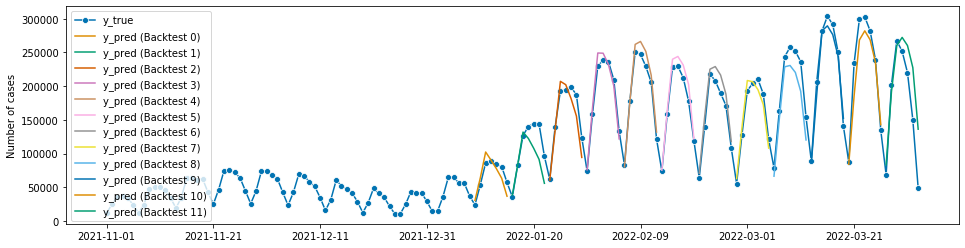

In [110]:
fig, ax = plot_series(
    y['2021-11-01':],
    df["y_pred"].iloc[0],
    df["y_pred"].iloc[1],
    df["y_pred"].iloc[2],
    df["y_pred"].iloc[3],
    df["y_pred"].iloc[4],
    df["y_pred"].iloc[5],
    df["y_pred"].iloc[6],
    df["y_pred"].iloc[7],
    df["y_pred"].iloc[8],
    df["y_pred"].iloc[9],
    df["y_pred"].iloc[10],
    df["y_pred"].iloc[11],
    markers=["o"]+[""]*12,
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(12)],
)
ax.legend();

In [111]:
forecaster = Prophet(
    seasonality_mode="multiplicative",
    n_changepoints=int(len(y_train) / 7),
    add_country_holidays={"country_name": "Germany"},
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
)

cv = ExpandingWindowSplitter(
    step_length=7, fh=[1, 2, 3, 4, 5, 6, 7], initial_window=int(len(y))-7*12
)

z = y.copy()
z = z.to_timestamp(freq="D")

df = evaluate(forecaster=forecaster, y=z, cv=cv, strategy="refit", return_data=True)
error_data.append(df.iloc[:, 0])
headers.append("Prophet")
df.iloc[:, :5]

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.249321,0.322507,1.789578,314,2022-01-08
1,0.582697,0.213101,1.921772,321,2022-01-15
2,0.721975,0.231365,1.791429,328,2022-01-22
3,0.604235,0.277483,1.775004,335,2022-01-29
4,0.363128,0.197516,1.895922,342,2022-02-05
5,0.077123,0.224367,1.810458,349,2022-02-12
6,0.159075,0.278876,1.770750,356,2022-02-19
7,0.225696,0.337116,1.881069,363,2022-02-26
8,0.034358,0.290960,1.759857,370,2022-03-05
9,0.059329,0.302430,1.748843,377,2022-03-12


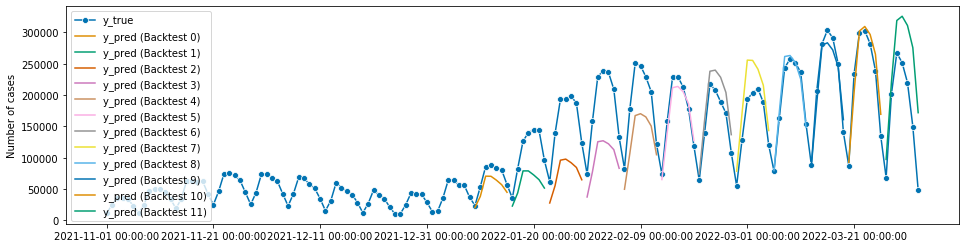

In [112]:
z = y.copy()
z = z.to_timestamp(freq="D")
fig, ax = plot_series(
    z['2021-11-01':],
    df["y_pred"].iloc[0],
    df["y_pred"].iloc[1],
    df["y_pred"].iloc[2],
    df["y_pred"].iloc[3],
    df["y_pred"].iloc[4],
    df["y_pred"].iloc[5],
    df["y_pred"].iloc[6],
    df["y_pred"].iloc[7],
    df["y_pred"].iloc[8],
    df["y_pred"].iloc[9],
    df["y_pred"].iloc[10],
    df["y_pred"].iloc[11],
    markers=["o"]+[""]*12,
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(12)],
)

ax.legend();

In [113]:
dfx = df.copy()
dfx['cutoff']

0    2022-01-08
1    2022-01-15
2    2022-01-22
3    2022-01-29
4    2022-02-05
5    2022-02-12
6    2022-02-19
7    2022-02-26
8    2022-03-05
9    2022-03-12
10   2022-03-19
11   2022-03-26
Name: cutoff, dtype: datetime64[ns]

In [114]:
df3 = pd.concat(error_data, axis=1, keys=headers)

In [115]:
df3

,ExponentialSmoothing,ThetaForecaster,ARIMA,AutoETS,Prophet
0,0.274793,0.386734,0.088818,0.196131,0.249321
1,0.358303,0.435357,0.233014,0.217434,0.582697
2,0.282891,0.290883,0.077286,0.101840,0.721975
3,0.135025,0.172815,0.093587,0.050442,0.604235
4,0.058190,0.141913,0.057886,0.054664,0.363128
5,0.093609,0.094142,0.070871,0.057812,0.077123
6,0.066485,0.073367,0.059234,0.091411,0.159075
7,0.073222,0.085728,0.115660,0.081911,0.225696
8,0.197268,0.233859,0.141936,0.143371,0.034358
9,0.117893,0.155234,0.098510,0.046501,0.059329


In [116]:
df4 = pd.concat([df3, dfx['cutoff']], axis=1)

In [117]:
df4

,ExponentialSmoothing,ThetaForecaster,ARIMA,AutoETS,Prophet,cutoff
0,0.274793,0.386734,0.088818,0.196131,0.249321,2022-01-08
1,0.358303,0.435357,0.233014,0.217434,0.582697,2022-01-15
2,0.282891,0.290883,0.077286,0.101840,0.721975,2022-01-22
3,0.135025,0.172815,0.093587,0.050442,0.604235,2022-01-29
4,0.058190,0.141913,0.057886,0.054664,0.363128,2022-02-05
5,0.093609,0.094142,0.070871,0.057812,0.077123,2022-02-12
6,0.066485,0.073367,0.059234,0.091411,0.159075,2022-02-19
7,0.073222,0.085728,0.115660,0.081911,0.225696,2022-02-26
8,0.197268,0.233859,0.141936,0.143371,0.034358,2022-03-05
9,0.117893,0.155234,0.098510,0.046501,0.059329,2022-03-12


In [118]:
df4.set_index(['cutoff'])

,ExponentialSmoothing,ThetaForecaster,ARIMA,AutoETS,Prophet
cutoff,,,,,
2022-01-08,0.274793,0.386734,0.088818,0.196131,0.249321
2022-01-15,0.358303,0.435357,0.233014,0.217434,0.582697
2022-01-22,0.282891,0.290883,0.077286,0.101840,0.721975
2022-01-29,0.135025,0.172815,0.093587,0.050442,0.604235
2022-02-05,0.058190,0.141913,0.057886,0.054664,0.363128
2022-02-12,0.093609,0.094142,0.070871,0.057812,0.077123
2022-02-19,0.066485,0.073367,0.059234,0.091411,0.159075
2022-02-26,0.073222,0.085728,0.115660,0.081911,0.225696
2022-03-05,0.197268,0.233859,0.141936,0.143371,0.034358


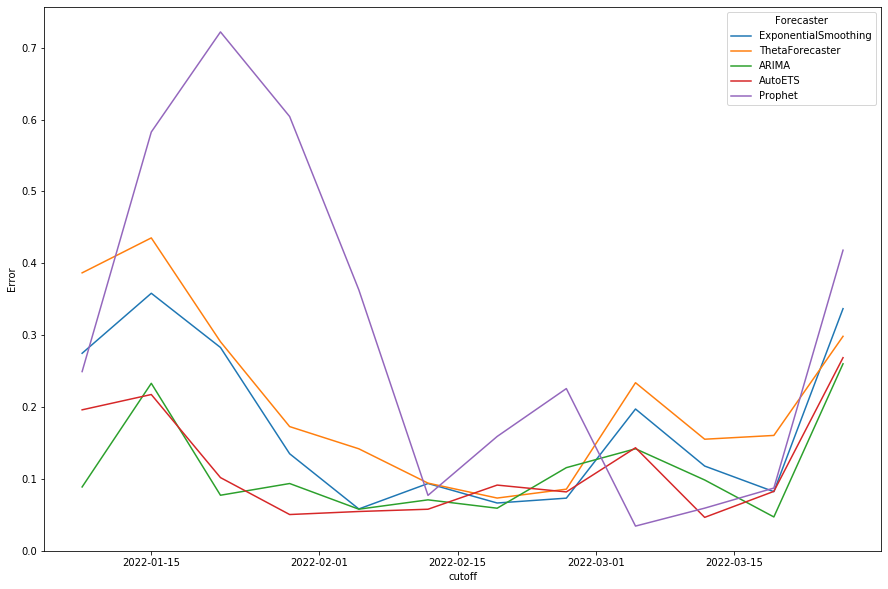

In [119]:
import seaborn as sns
df4 = pd.melt(df4, 'cutoff', var_name='Forecaster', 
              value_name='Error')

sns.lineplot('cutoff', 'Error', hue='Forecaster', 
             data=df4)

How we can observe from plot above, forecasters with the lowest error trend in backtest cases are AutoETS and ARIMA. Therefore, both of them can be used as main forecaster for further deploying process.